In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from sklearn import linear_model

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.linear_model import Ridge

In [2]:
prop24 = pd.read_csv('prop24.csv')

In [3]:
prop24 = prop24.drop(['parking_lots'], axis = 1)

set price. bedrooms and baths to numeric

In [4]:
prop24['price'] = [amt.strip('\r\r\n ₦ ') for amt in prop24['price']]

In [5]:
prop24['price'] = prop24['price'].str.replace('\xa0', '').astype(float)

In [6]:
prop24.loc[:,'unit'] = prop24['unit'].fillna('Per Year')

In [7]:
prop24['unit'] = prop24['unit'].astype(str).str.strip()

In [8]:
prop24.loc[:,'baths'] = pd.to_numeric(prop24['baths'],errors='coerce')

In [9]:
prop24 = prop24.dropna(subset=['bedrooms', 'location'])

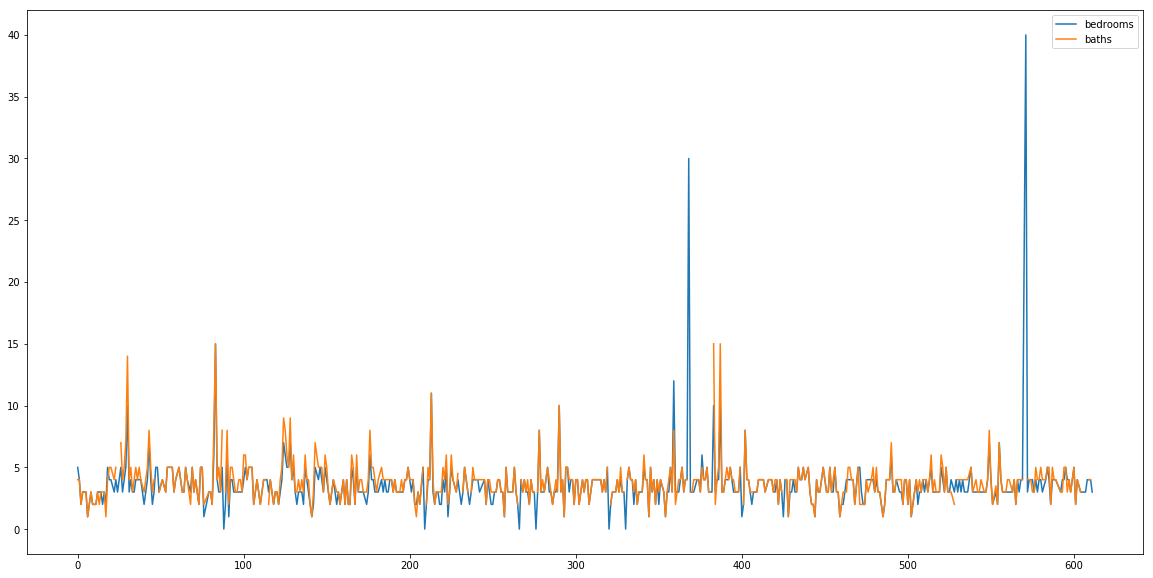

In [10]:
plt.figure(figsize=(20,10))
plt.plot(prop24.bedrooms)
plt.plot(prop24.baths)
plt.legend(loc='best')
plt.show()

In [11]:
prop24.loc[:,'baths'] = prop24['baths'].fillna(prop24['bedrooms'])


In [12]:
prop24['unit'].value_counts()

Per Year     486
Per Month     53
Per Day       23
Per m²         4
Name: unit, dtype: int64

In [13]:
prop24 = prop24[prop24.unit != 'Per m²']

In [14]:
per_m = prop24['unit']=='Per Month'

prop24.price[per_m] = prop24.price[per_m] * 12

prop24.unit[per_m] = 'Per Year'

In [15]:
per_d = prop24['unit']=='Per Day'

prop24.price[per_d] = prop24.price[per_d] * 360

prop24.unit[per_d] = 'Per Year'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [16]:

def get_location(address):
    split_address = address.split(',')
    location = split_address[-2].strip().lower()
    return location

def get_address(address):
    split_address = address.split(',')
    addr = split_address[0] + split_address[1]      
    return addr


In [17]:
prop24['state'] = [st.strip().lower() for st in prop24['state']]
prop24['sub location'] = list(map(lambda x:get_location(x),prop24['location']))
prop24['address'] = list(map(lambda x:get_address(x),prop24['location']))

In [18]:
prop24 = prop24.drop(['location'], axis = 1)

In [19]:
prop24 = prop24.reset_index(drop=True)

In [20]:
propcn = pd.read_csv('propcntr.csv')

In [21]:
propcn = propcn.drop(['parking_lots'], axis = 1)

In [22]:
propcn['price'] = propcn['price'].str.replace(',', '').astype(float)

In [23]:
propcn['unit'] = 'Per Year'

In [24]:
propcn['bedrooms'] = propcn['bedrooms'].str.replace(',', '').astype(float)
propcn['baths'] = propcn['baths'].str.replace(',', '').astype(float)

In [25]:
propcn = propcn.dropna(subset=['price','location','bedrooms'])

In [26]:
propcn['baths'] = propcn['baths'].fillna(propcn['bedrooms'])


In [27]:
def get_state(address):
    split_address = address.split(',')
    state = split_address[-1].strip().lower()
    return state

def get_location(address):
    split_address = address.split(',')
    location = split_address[-2].strip().lower()
    return location

def get_address(address):
    split_address = address.split(',')
    addr = split_address[0] + split_address[1]      
    return addr


In [28]:
propcn['state'] = list(map(lambda x:get_state(x),propcn['location']))
propcn['sub location'] = list(map(lambda x:get_location(x),propcn['location']))
propcn['address'] = list(map(lambda x:get_address(x),propcn['location']))

In [29]:
propcn = propcn.drop(['location'], axis = 1)

In [30]:
propcn = propcn.reset_index(drop=True)

In [31]:
propex = pd.read_csv('propexp.csv')  

In [32]:
propex['price'] = [amt.strip('₦') for amt in propex['price']]

In [33]:
propex['price'] = propex['price'].str.replace(',', '').astype(float)

In [34]:
propex = propex.drop(['parking_lots'], axis = 1)

In [35]:
propex = propex.dropna(subset=['price','location','bedrooms'])

In [36]:
def get_state(address):
    split_address = address.split(',')
    state = split_address[-1].strip().lower()
    return state

def get_location(address):
    split_address = address.split(',')
    location = split_address[-2].strip().lower()
    return location

def get_address(address):
    split_address = address.split(',')
    addr = split_address[0]    
    return addr


In [37]:
propex['state'] = list(map(lambda x:get_state(x),propex['location']))
propex['sub location'] = list(map(lambda x:get_location(x),propex['location']))
propex['address'] = list(map(lambda x:get_address(x),propex['location']))

In [38]:
propex = propex.drop(['location'], axis = 1)

In [39]:
proppr = pd.read_csv('proppro.csv')

In [40]:
proppr['price'] = proppr['price'].str.replace(',', '').astype(float)

In [41]:
proppr = proppr[proppr['location'] != ' ']

In [42]:
def get_state(address):
    split_address = address.split(' ')
    state = split_address[-1].strip().lower()
    return state

def get_location(address):
    split_address = address.split(' ')
    location = split_address[-2].strip().lower()
    return location

def get_address(address):
    split_address = address.split(' ')
    addr = split_address[1:-2]
    addr = ' '.join(addr)
    return addr


In [43]:
proppr['state'] = list(map(lambda x:get_state(x),proppr['location']))
proppr['sub location'] = list(map(lambda x:get_location(x),proppr['location']))
proppr['address'] = list(map(lambda x:get_address(x),proppr['location']))

In [44]:
proppr = proppr.drop(['location'], axis = 1)

In [45]:
proppr['bedrooms'] = list(map(lambda x:x.split(' ')[0],proppr['bedrooms'])) 

proppr['baths'] = list(map(lambda x:x.split(' ')[0],proppr['baths'])) 

In [46]:
proppr = proppr[proppr['bedrooms'] != '']
proppr = proppr[proppr['baths'] != '']

In [47]:
proppr['baths'] = proppr['baths'].astype(float)
proppr['bedrooms'] = proppr['bedrooms'].astype(float)

In [48]:
proppr = proppr[proppr['bedrooms'] != 0]

In [49]:
proppr = proppr.reset_index(drop=True)

In [50]:
renting = pd.read_csv('renting.csv') 

In [51]:
renting = renting.dropna(subset=['price','location','bedrooms'])

In [52]:
renting['price'] = [amt.lstrip('₦ ') for amt in renting['price']]

renting['price'] = [amt.partition(' / ')[0] for amt in renting['price']]

renting['price'] = renting['price'].str.replace(',', '').astype(float)

In [53]:
renting['unit'] = list(map(lambda x:x.split(' / ')[1],renting['unit']))

In [54]:

renting.price[renting['unit']=='Monthly'] = renting.price[renting['unit']=='Monthly'] * 12
renting.price[renting['unit']=='Weekly'] = renting.price[renting['unit']=='Weekly'] * 52

renting['unit'] = 'Per Year'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
renting['baths'] = renting['bedrooms'] 

In [56]:
def get_state(address):
    split_address = address.split('/')
    state = split_address[0].strip().lower()
    return state

def get_location(address):
    split_address = address.split('/')
    location = split_address[1].strip().lower()
    return location

def get_address(address):
    split_address = address.split('/')
    addr = split_address[1]
    return addr


In [57]:
renting['state'] = list(map(lambda x:get_state(x),renting['location']))
renting['sub location'] = list(map(lambda x:get_location(x),renting['location']))
renting['address'] = list(map(lambda x:get_address(x),renting['location']))

In [58]:
renting.state[renting['state']=='ABUJA (FCT)'] = 'Abuja'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
renting = renting.drop(['location'], axis = 1)

In [60]:
renting = renting.reset_index(drop=True)

In [61]:
trovit = pd.read_csv('trovit.csv')

In [62]:
trovit = trovit.dropna(subset=['price','location','bedrooms'])

In [63]:
trovit['price'] = [amt.strip('₦') for amt in trovit['price']]

In [64]:
trovit['price'] = trovit['price'].str.replace(',', '').astype(float)

In [65]:
trovit['bedrooms'] = list(map(lambda x:x.split(' ')[0],trovit['bedrooms']))

trovit['bedrooms'] = trovit['bedrooms'].astype(float)

In [66]:
trovit['baths'] = list(map(lambda x:x.split(' ')[0],trovit['baths']))

trovit['baths'] = trovit['baths'].astype(float)

In [67]:
def get_state(address):
    split_address = address.split(',')
    state = split_address[-1].strip().lower()
    return state

def get_location(address):
    split_address = address.split(',')
    if len(split_address) > 1: location = split_address[-2].strip().lower()
    else: location = address
    return location

def get_address(address):
    split_address = address.split(',')
    if len(split_address) > 1:
        addr = split_address[0:-2]
        addr = ' '.join(addr)
    else: addr = address
    return addr


In [68]:
trovit['state'] = list(map(lambda x:get_state(x),trovit['location']))
trovit['sub location'] = list(map(lambda x:get_location(x),trovit['location']))
trovit['address'] = list(map(lambda x:get_address(x),trovit['location']))

In [69]:
trovit.address[trovit['address']==''] = trovit['sub location'][trovit['address']=='']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
trovit['state'] = [st.strip(' state') for st in trovit['state']]

In [71]:
trovit = trovit.drop(['location'], axis = 1)

In [72]:
trovit = trovit.reset_index(drop=True)

In [73]:
castles = pd.read_csv('castles.csv')  

In [74]:
castles['price'] = [amt.strip('\r\n ₦') for amt in castles['price']]

In [75]:
castles = castles[castles['price'] != 'Price on call']

In [76]:
def clean_price(price):
    actual = 0
    spl = price.split(' ')
    if len(spl) > 1:
        val = spl[0]
        mult = spl[1]        
        if mult == 'billion': actual = float(val) * 1000000000
        elif mult == 'million': actual = float(val) * 1000000
        elif mult == 'thousand': actual = float(val) * 1000
        else: actual = price
    return actual
    

In [77]:
castles['price'] = list(map(lambda x:clean_price(x),castles['price']))

In [78]:
castles['price'] = castles['price'].astype(float)

In [79]:
castles = castles[castles['price'] != 0]

In [80]:
castles['unit'] = 'Per Year'

In [81]:
castles['bedrooms'] = pd.to_numeric(castles['bedrooms'], errors ='coerce')

In [82]:
castles = castles.dropna(subset=['price','location','bedrooms'])

In [83]:
castles['bedrooms'] = castles['bedrooms'].astype(float)

In [84]:
castles['baths'] = castles['bedrooms']

In [85]:

def get_location(address):
    split_address = address.split(',')
    if len(split_address) > 1: location = split_address[-1].strip().lower()
    else: location = address
    return location

def get_address(address):
    split_address = address.split(',')
    if len(split_address) > 1:
        addr = split_address[0:-1]
        addr = ' '.join(addr)
    else: addr = address
    return addr


In [86]:
castles['state'] = [st.strip().lower() for st in castles['state']]
castles['sub location'] = list(map(lambda x:get_location(x),castles['location']))
castles['address'] = list(map(lambda x:get_address(x),castles['location']))

In [87]:
castles = castles.drop(['location'], axis = 1)

In [88]:
castles = castles.reset_index(drop=True)

In [89]:
findnigprop = pd.read_csv('findnigprop.csv')

In [90]:
findnigprop = findnigprop.dropna(subset=['price','location','bedrooms'])

In [91]:
findnigprop = findnigprop[findnigprop.price != ' ']

In [92]:
findnigprop['price'] = [amt.lstrip('₦') for amt in findnigprop['price']]
findnigprop['price'] = [amt.lstrip('$') for amt in findnigprop['price']]

findnigprop['price'] = [amt.partition('.00 Per ')[0] for amt in findnigprop['price']]
findnigprop['price'] = [amt.partition('.00 per ')[0] for amt in findnigprop['price']]

findnigprop['price'] = [amt.partition(' Per ')[0] for amt in findnigprop['price']]
findnigprop['price'] = [amt.partition(' per ')[0] for amt in findnigprop['price']]

#findnigprop['price'] = [amt.strip('.00 ') for amt in findnigprop['price']]

findnigprop['price'] = findnigprop['price'].str.replace(',', '')


In [93]:
findnigprop['price'] = pd.to_numeric(findnigprop['price'], errors = 'raise')

In [94]:
findnigprop['unit'] = [amt.partition(' Per ')[2] for amt in findnigprop['unit']]

In [95]:
findnigprop['unit'] = 'Per Year'

In [96]:
findnigprop['bedrooms'] = findnigprop.bedrooms[findnigprop.bedrooms != 0]

In [97]:
findnigprop = findnigprop.dropna(subset=['price','location','bedrooms'])

In [98]:
findnigprop['baths'][findnigprop['baths'].isnull()] = findnigprop['bedrooms'][findnigprop['baths'].isnull()]

In [99]:
findnigprop = findnigprop.reset_index(drop=True)

In [100]:
findnigprop['baths'] = findnigprop['baths'].astype(str)

In [101]:
findnigprop['baths'] = [amt.rstrip('f') for amt in findnigprop['baths']]

In [102]:
findnigprop['baths'][findnigprop['baths']=='0'] = findnigprop['bedrooms'][findnigprop['baths']=='0']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
findnigprop['baths'] = findnigprop['baths'].astype(float)

In [104]:
def get_state(address):
    split_address = address.split(',')
    if len(split_address) > 1: state = split_address[-2].strip().lower()
    else: state = None
    return state

def get_location(address):
    split_address = address.split(',')
    if len(split_address) > 2: location = split_address[-3].strip().lower()
    else: location = split_address[-2].strip().lower()
    return location

def get_address(address):
    split_address = address.split(',')
    if len(split_address) > 3: addr = split_address[0:-3]
    else: addr = split_address[-2]
    addr = ' '.join(addr)
    return addr


In [105]:
findnigprop['state'] = list(map(lambda x:get_state(x),findnigprop['location']))
findnigprop['sub location'] = list(map(lambda x:get_location(x),findnigprop['location']))
findnigprop['address'] = list(map(lambda x:get_address(x),findnigprop['location']))

In [106]:

findnigprop['state'] = findnigprop.state[findnigprop.state != '']
findnigprop['sub location'] = findnigprop.state[findnigprop['sub location'] != '']
findnigprop['address'] = findnigprop.state[findnigprop.address != '']

findnigprop = findnigprop.dropna(subset=['state', 'sub location', 'address'])

In [107]:
findnigprop = findnigprop.drop(['location'], axis = 1)

In [108]:
findnigprop = findnigprop.reset_index(drop=True)

In [109]:
hutbay = pd.read_csv('hutbay.csv') 

In [110]:
hutbay['price'] = [amt.strip('\r\r\n ₦') for amt in hutbay['price']]

In [111]:

hutbay['price'] = hutbay['price'].str.replace(',', '')
hutbay['price'] = pd.to_numeric(hutbay['price'], errors ='coerce')

In [112]:
hutbay = hutbay.dropna(subset=['price','location','bedrooms'])

In [113]:
hutbay.price[hutbay['unit']=='/ half yr'] = hutbay.price[hutbay['unit']=='/ half yr'] * 2
hutbay.price[hutbay['unit']=='/ mon'] = hutbay.price[hutbay['unit']=='/ mon'] * 12
hutbay.price[hutbay['unit']=='/ wk'] = hutbay.price[hutbay['unit']=='/ wk'] * 52
hutbay.price[hutbay['unit']=='/ day'] = hutbay.price[hutbay['unit']=='/ day'] * 360
hutbay.price[hutbay['unit']=='/ night'] = hutbay.price[hutbay['unit']=='/ night'] * 360


hutbay['unit'] = 'Per Year'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\

In [114]:
hutbay['bedrooms'] = [rm.partition('Baths')[0] for rm in hutbay['bedrooms']]
hutbay['bedrooms'] = [rm.partition('Bath')[0] for rm in hutbay['bedrooms']]

hutbay['baths'] = hutbay['bedrooms']

hutbay['bedrooms'] = [rm.partition(' Beds / ')[0] for rm in hutbay['bedrooms']]
hutbay['baths'] = [bath.partition(' Beds / ')[0] for bath in hutbay['baths']]
hutbay['bedrooms'] = [rm.partition(' Bed / ')[0] for rm in hutbay['bedrooms']]
hutbay['baths'] = [bath.partition(' Bed / ')[0] for bath in hutbay['baths']]

In [115]:
hutbay['bedrooms'] = pd.to_numeric(hutbay['bedrooms'], errors ='coerce')
hutbay['baths'] = pd.to_numeric(hutbay['baths'], errors ='coerce')

hutbay = hutbay.dropna(subset=['price','location','bedrooms'])

In [116]:
def get_state(address):
    split_address = address.split(',')
    if len(split_address) > 1: state = split_address[-1].strip().lower()
    else: state = None
    return state

def get_location(address):
    split_address = address.split(',')
    if len(split_address) > 1: location = split_address[-2].strip().lower()
    else: location = split_address[0].strip().upper()
    return location

def get_address(address):
    split_address = address.split(',')
    addr = split_address[0]
    return addr


In [117]:
hutbay['state'] = list(map(lambda x:get_state(x),hutbay['location']))
hutbay['sub location'] = list(map(lambda x:get_location(x),hutbay['location']))
hutbay['address'] = list(map(lambda x:get_address(x),hutbay['location']))

In [118]:

hutbay['state'] = 'lagos'

hutbay = hutbay.dropna(subset=['state', 'sub location', 'address'])

In [119]:
hutbay = hutbay.drop(['location'], axis = 1)

In [120]:
hutbay = hutbay.reset_index(drop=True)

In [121]:
naijaprop = pd.read_csv('naijaprop.csv')

In [122]:

naijaprop['price'] = naijaprop['price'].str.replace(',', '')
naijaprop['price'] = pd.to_numeric(naijaprop['price'], errors ='coerce')

In [123]:
naijaprop = naijaprop.dropna(subset=['price','location','bedrooms'])

In [124]:
naijaprop['price'][10] = naijaprop['price'][10] *1000000
naijaprop['price'][17] = naijaprop['price'][10] *1000000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [125]:
naijaprop['baths'][naijaprop.baths.isnull()] = naijaprop['bedrooms'][naijaprop.baths.isnull()]

In [126]:
def get_location(address):
    split_address = address.split(',')
    location = split_address[-2].strip().lower()
    return location

def get_address(address):
    split_address = address.split(',')
    addr = split_address[0:-2]
    addr = ' '.join(addr)
    return addr


In [127]:
naijaprop['state'] = [st.strip().lower() for st in naijaprop['state']]
naijaprop['sub location'] = list(map(lambda x:get_location(x),naijaprop['location']))
naijaprop['address'] = list(map(lambda x:get_address(x),naijaprop['location']))

In [128]:
naijaprop['sub location'][naijaprop['sub location'] == ''] = naijaprop['address'][naijaprop['sub location'] == '']
naijaprop['address'][naijaprop['address'] == ''] = naijaprop['sub location'][naijaprop['address'] == '']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [129]:
naijaprop = naijaprop.drop(['location'], axis = 1)

In [130]:
naijaprop = naijaprop.reset_index(drop=True)

In [131]:
naijapropfind = pd.read_csv('naijapropfind.csv')

In [132]:
naijapropfind['price'] = [amt.strip('₦') for amt in naijapropfind['price']]
naijapropfind['price'] = naijapropfind['price'].str.replace(',', '').astype(float)
#naijapropfind['price'] = pd.to_numeric(naijapropfind['price'], errors ='coerce')

In [133]:
naijapropfind['unit'] = 'Per Year'

In [134]:
def get_location(address):
    split_address = address.split(',')
    location = split_address[-2].strip().lower()
    return location

def get_address(address):
    split_address = address.split(',')
    addr = split_address[-2]
    return addr


In [135]:
naijapropfind['state'] = 'enugu'
naijapropfind['sub location'] = list(map(lambda x:get_location(x),naijapropfind['location']))
naijapropfind['address'] = list(map(lambda x:get_address(x),naijapropfind['location']))

In [136]:
naijapropfind = naijapropfind.drop(['location'], axis = 1)

In [137]:
naijapropfind = naijapropfind.reset_index(drop=True)

In [170]:
import warnings
warnings.filterwarnings('ignore')

In [139]:
dfs_listings = [prop24,propcn,propex,proppr,renting,trovit,castles,findnigprop,hutbay,naijaprop,naijapropfind] 

listings = pd.concat(dfs_listings,ignore_index=True)

In [140]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31987 entries, 0 to 31986
Data columns (total 7 columns):
price           31987 non-null float64
unit            31987 non-null object
bedrooms        31987 non-null float64
baths           31987 non-null float64
state           31987 non-null object
sub location    31987 non-null object
address         31987 non-null object
dtypes: float64(3), object(4)
memory usage: 1.7+ MB


In [141]:
listings = listings[listings.price > 9999]

listings = listings[listings.price < 10000000]

In [142]:
listings = listings[listings.bedrooms < 10]
listings = listings[listings.bedrooms > 0]
listings = listings[listings.baths < 10]
listings = listings[listings.bedrooms > 0]

In [143]:
listings = listings.groupby('sub location').filter(lambda x: len(x) > 20)

In [144]:
listings = listings.groupby('bedrooms').filter(lambda x: len(x) > 20)
listings = listings.groupby('baths').filter(lambda x: len(x) > 20)

In [145]:
listings = listings[listings['state']!='edo']
listings = listings[listings['state']!='enugu']
listings = listings[listings['state']!='kaduna']
listings = listings[listings['state']!='do']
listings = listings[listings['state']!='kadun']
listings = listings[listings['state']!='kwara']

In [146]:
listings['state'][listings['state']=='lago'] = 'lagos'
listings['state'][listings['state']=='federal capital territory'] = 'abuja'
listings['state'][listings['state']=='abuja (fct)'] = 'abuja'
listings['state'][listings['state']=='abuja fct'] = 'abuja'
listings['state'][listings['state']=='river'] = 'rivers'
listings['state'][listings['state']=='kwar'] = 'kwara'


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [147]:
listings['sub location'][listings['sub location']=='CHEVY'] = 'chevy view estate'
listings['sub location'][listings['sub location']=='IKEJA GRA'] = 'ikeja'
listings['sub location'][listings['sub location']=='LEKKI PHASE 1'] = 'lekki'
listings['sub location'][listings['sub location']=='OFF ADMIRALTY WAY'] = 'lekki'
listings['sub location'][listings['sub location']=='OSAPA LONDON'] = 'osapa'
listings['sub location'][listings['sub location']=='camp'] = 'life camp'
listings['sub location'][listings['sub location']=='harcourt'] = 'port-harcourt'
listings['sub location'][listings['sub location']=='ibadan north west'] = 'ibadan'
listings['sub location'][listings['sub location']=='ikoyi-obalende'] = 'ikoyi'
listings['sub location'][listings['sub location']=='island'] = 'lagos island'
listings['sub location'][listings['sub location']=='lagos'] = 'lagos island'
listings['sub location'][listings['sub location']=='lokogoma district'] = 'lokogoma'
listings['sub location'][listings['sub location']=='oshodi/isolo'] = 'oshodi'
listings['sub location'][listings['sub location']=='port harcourt'] = 'port-harcourt'
listings['sub location'][listings['sub location']=='victoria island (vi)'] = 'victoria island'


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [148]:
listings['sub location'] = [loc.lower() for loc in listings['sub location']]


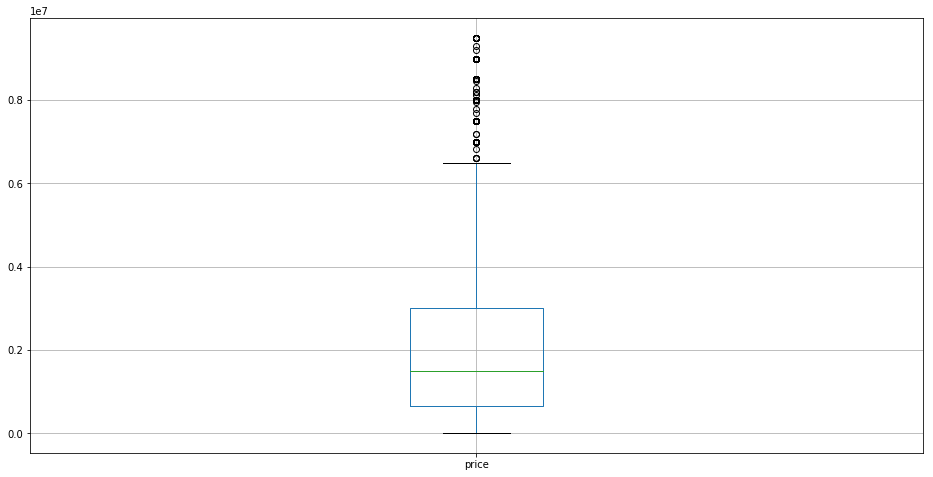

In [149]:
listings.boxplot('price', figsize=(16,8))
plt.show()


In [150]:
bins = [1,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000,12000000,13000000,14000000,15000000,16000000,17000000,18000000,19000000,20000000]
groups = pd.cut(listings.price, bins)
groups.value_counts() #.size().unstack()

(1, 1000000]            9876
(1000000, 2000000]      6136
(2000000, 3000000]      3496
(3000000, 4000000]      2346
(4000000, 5000000]      1290
(5000000, 6000000]       815
(6000000, 7000000]       589
(7000000, 8000000]       463
(8000000, 9000000]       193
(9000000, 10000000]       12
(18000000, 19000000]       0
(10000000, 11000000]       0
(11000000, 12000000]       0
(12000000, 13000000]       0
(13000000, 14000000]       0
(14000000, 15000000]       0
(15000000, 16000000]       0
(16000000, 17000000]       0
(17000000, 18000000]       0
(19000000, 20000000]       0
Name: price, dtype: int64

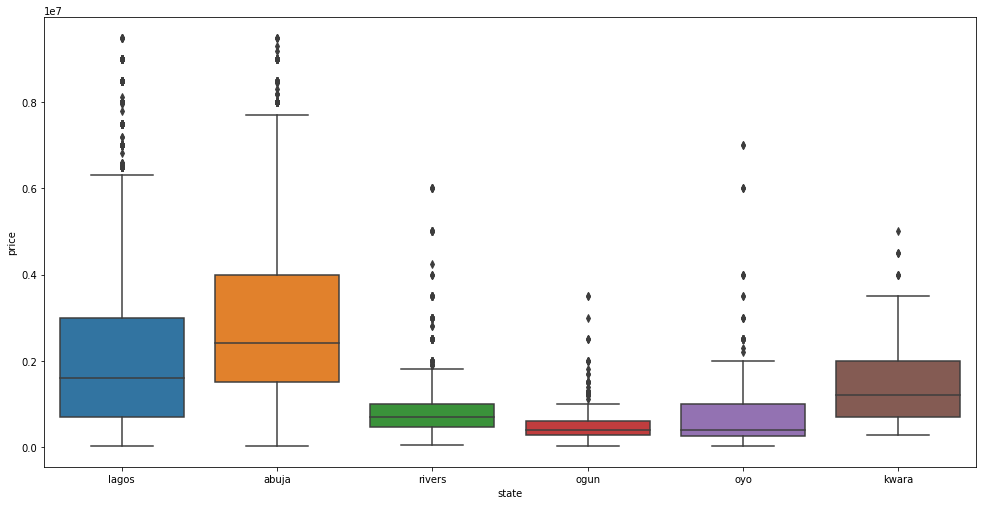

In [151]:
a4_dims = (16.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="state",y="price",data=listings,ax=ax)


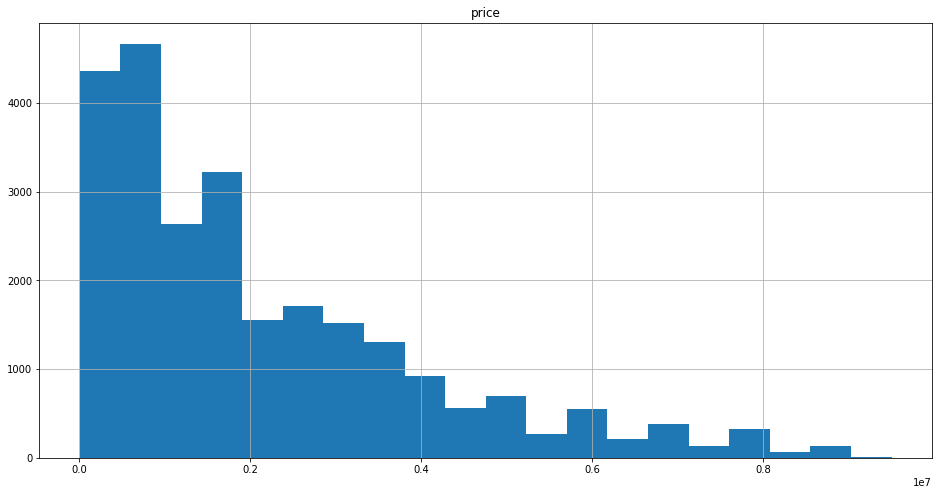

In [152]:
listings.hist(column = 'price', bins = 20, figsize=(16,8))
plt.show()

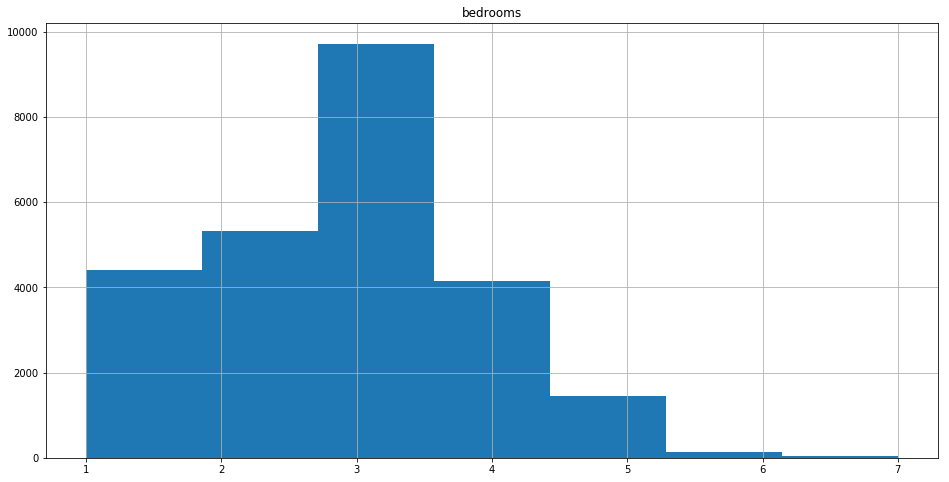

In [153]:
listings.hist(column = 'bedrooms', bins = 7, figsize=(16,8))
plt.show()

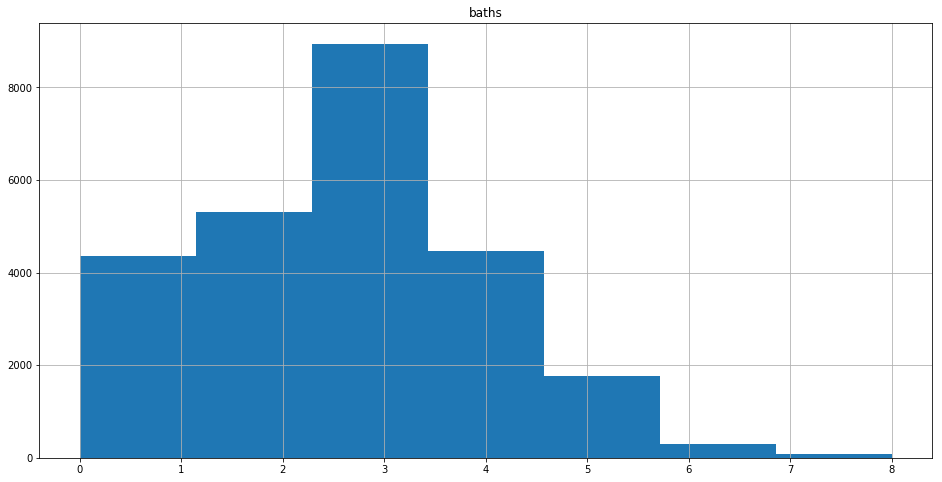

In [154]:
listings.hist(column = 'baths', bins = 7, figsize=(16,8))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\palettes.py:727: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


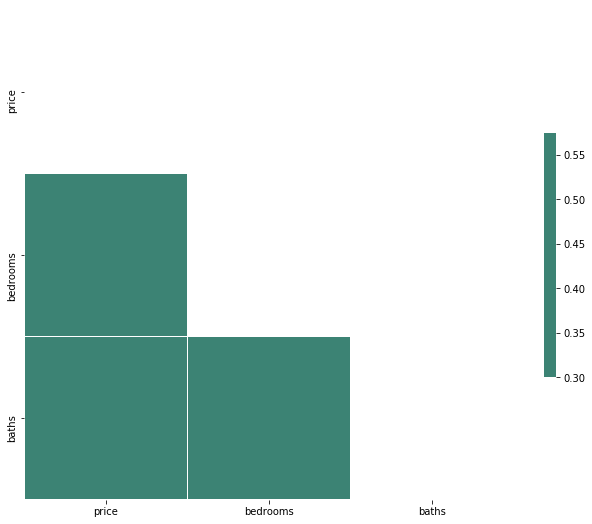

In [155]:
correlation_data=listings.select_dtypes(include=[np.number]).corr()
mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(359, 169, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [156]:
print(correlation_data)

             price  bedrooms     baths
price     1.000000  0.574849  0.576608
bedrooms  0.574849  1.000000  0.925349
baths     0.576608  0.925349  1.000000


In [157]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25216 entries, 1 to 31978
Data columns (total 7 columns):
price           25216 non-null float64
unit            25216 non-null object
bedrooms        25216 non-null float64
baths           25216 non-null float64
state           25216 non-null object
sub location    25216 non-null object
address         25216 non-null object
dtypes: float64(3), object(4)
memory usage: 2.2+ MB


In [158]:
listings_onehot = pd.get_dummies(listings, columns=['state',"sub location"], prefix = ['state',"sub location"])

In [159]:
listings_onehot.head()

,price,unit,bedrooms,baths,address,state_abuja,state_kwara,state_lagos,state_ogun,state_oyo,...,sub location_parkview estate,sub location_port-harcourt,sub location_sangotedo,sub location_shomolu,sub location_surulere,sub location_utako,sub location_victoria island,sub location_wuse 2,sub location_wuye,sub location_yaba
1,3200000.0,Per Year,4.0,4.0,IKOTA Lekki,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000000.0,Per Year,2.0,2.0,IKATE Lekki,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000.0,Per Year,3.0,3.0,ONIRU Victoria Island,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1000000.0,Per Year,3.0,3.0,Ado road Close to Ecobank off Ajah busstop Lekki,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,550000.0,Per Year,1.0,1.0,Unity Estate Badore by Co-operative Estate. Lekki,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
listings_onehot = listings_onehot.reset_index(drop =True)

In [161]:
listings_onehot = listings_onehot.drop(['unit','address'], axis = 1)

In [162]:
X = listings_onehot.drop(['price'], axis = 1)
y = listings_onehot[['price']]

In [163]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(18912, 90) (18912, 1)
(6304, 90) (6304, 1)


In [164]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [165]:
mse = np.mean((predictions - y_test)**2)
rmse = np.sqrt(mse)

print('R squared: \n', lm.score(X,y))
print('Mean Square Error: \n', mse)
print('Root Mean Square Error: \n', rmse)

R squared: 
 0.6284444202143264
Mean Square Error: 
 price    1.410321e+12
dtype: float64
Root Mean Square Error: 
 price    1.187569e+06
dtype: float64


In [166]:
## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)



## calculating score 

print('R square',ridgeReg.score(X_test,y_test))

print('MSE',mse)

print('RMSE',np.sqrt(mse))

R square 0.62969697466008
MSE price    1.415642e+12
dtype: float64
RMSE price    1.189808e+06
dtype: float64


In [167]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit = model.fit(X_train, y_train)
    y_pred = fit.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return ([model_name,r2])

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    LinearRegression(),
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    GaussianNB(),
    LinearSVC(),
    svm.SVR(),
   DecisionTreeRegressor()
]

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [169]:
model_train=list(map(lambda x: compare_models(x),models))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [171]:
model_train

[['LinearRegression', 0.6310889239645605],
 ['GradientBoostingRegressor', 0.6591682264876079],
 ['RandomForestRegressor', 0.47735553101613826],
 ['GaussianNB', -0.5039227657486665],
 ['LinearSVC', 0.4458535984828659],
 ['SVR', -0.10536445231262337],
 ['DecisionTreeRegressor', 0.6563634710141324]]

In [172]:
test_df=pd.DataFrame(X_test,columns=listings_onehot.loc[:, listings_onehot.columns != 'price'].columns)
test_df.head()

,bedrooms,baths,state_abuja,state_kwara,state_lagos,state_ogun,state_oyo,state_rivers,sub location_ado odo/ota,sub location_agege,...,sub location_parkview estate,sub location_port-harcourt,sub location_sangotedo,sub location_shomolu,sub location_surulere,sub location_utako,sub location_victoria island,sub location_wuse 2,sub location_wuye,sub location_yaba
19167,4.0,4.0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
24731,3.0,3.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17287,2.0,2.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24089,3.0,3.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13071,5.0,5.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [173]:
state=test_df[[col for col in test_df.columns if 'state_' in col]].stack()[test_df[[col for col in test_df.columns if 'state_' in col]].stack()>0]

statelist=list(pd.DataFrame(state).index.get_level_values(1))

states = [i.split("_")[1] for i in statelist]


In [174]:
itm = test_df[[col for col in test_df.columns if 'sub location' in col]].stack()[test_df[[col for col in test_df.columns if 'sub location' in col]].stack()>0]

itmlist = list(pd.DataFrame(itm).index.get_level_values(1))

items = [i.split("_")[1] for i in itmlist]


In [175]:
test_df.drop([col for col in test_df.columns if 'sub location' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'state' in col],axis=1,inplace=True)
test_df['sub location'] = items
test_df['state'] = states

test_df.head()

,bedrooms,baths,sub location,state
19167,4.0,4.0,port-harcourt,rivers
24731,3.0,3.0,lekki,lagos
17287,2.0,2.0,alimosho,lagos
24089,3.0,3.0,agege,lagos
13071,5.0,5.0,agege,lagos


In [176]:
clf=DecisionTreeRegressor()
model=clf.fit(X_train,y_train)

In [177]:
test_df["price_actual"]=pd.DataFrame(y_test)["price"].tolist()
test_df["price_predicted"]= model.predict(X_test)
test_group=test_df.groupby("state")
test_group.apply(lambda x: r2_score(x.price_actual,x.price_predicted))

state
abuja     0.486912
kwara     0.659049
lagos     0.662317
ogun      0.262944
oyo       0.300240
rivers    0.503177
dtype: float64

In [178]:
listings_lagos = listings[listings.state=='lagos']

In [179]:
listings_onehot_lagos = pd.get_dummies(listings_lagos, columns=['state',"sub location"], prefix = ['state',"sub location"])

In [180]:
listings_onehot_lagos = listings_onehot_lagos.drop(['unit','address'], axis = 1)

In [181]:
X_lag = listings_onehot_lagos.drop(['price'], axis = 1)
y_lag = listings_onehot_lagos[['price']]

In [182]:
# create training and testing vars
X_train_lag, X_test_lag, y_train_lag, y_test_lag = train_test_split(X_lag, y_lag, test_size=0.25)
print (X_train_lag.shape, y_train_lag.shape)
print (X_test_lag.shape, y_test_lag.shape)

(15027, 62) (15027, 1)
(5010, 62) (5010, 1)


In [183]:
clf=DecisionTreeRegressor()
model=clf.fit(X_train_lag,y_train_lag)

pred_lag = model.predict(X_test_lag)

rscore_lag = r2_score(y_test_lag,pred_lag)

rscore_lag

0.6614174008703162

In [184]:
listings_others = listings[listings.state!='lagos']

In [185]:
listings_onehot_others = pd.get_dummies(listings_others, columns=['state',"sub location"], prefix = ['state',"sub location"])

listings_onehot_others = listings_onehot_others.drop(['unit','address'], axis = 1)

In [186]:
X_others = listings_onehot_others.drop(['price'], axis = 1)
y_others = listings_onehot_others[['price']]

# create training and testing vars
X_train_others, X_test_others, y_train_others, y_test_others = train_test_split(X_others, y_others, test_size=0.25)
print (X_train_others.shape, y_train_others.shape)
print (X_test_others.shape, y_test_others.shape)

(3884, 46) (3884, 1)
(1295, 46) (1295, 1)


In [187]:
clf=DecisionTreeRegressor()
model=clf.fit(X_train_others,y_train_others)

pred_others = model.predict(X_test_others)

rscore_others = r2_score(y_test_others,pred_others)

rscore_others

0.5564607678650959

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
train_data = scaler.transform(X_train)
test_data = scaler.transform(X_test)

In [190]:
from sklearn.decomposition import PCA

pca = PCA(.80)
pca.fit(train_data)
train_data = pca.transform(train_data)
test_data = pca.transform(test_data)
pca.n_components_

64

In [191]:
train_data.shape

(18912, 64)

In [192]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=42))])

pipe_dt = Pipeline([('clf', DecisionTreeRegressor(random_state=42))])

pipe_gbm = Pipeline([('clf', GradientBoostingRegressor(random_state=42))])

param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_leaf': param_range,
    'clf__max_depth': param_range,
    'clf__min_samples_split': param_range[1:]}]

param_grid_gbm=[{'clf__n_estimators':[100], 
                'clf__learning_rate': [0.05, 0.02, 0.01], 
            'clf__max_depth':[4,6], 
            'clf__min_samples_leaf':[3,5,9,17], 
            'max_features':[1.0,0.3,0.1] }] 

param_grid_dt={'clf_n_estimators':[100], 'clf_learning_rate': [0.05, 0.02, 0.01], 
            'clf__max_depth':[4,6], 
            'clf__min_samples_leaf':[3,5,9,17], 
            'clf__max_features':[1.0,0.3,0.1] } 

n_jobs=4 

gs_rf = GridSearchCV(estimator=pipe_rf,
param_grid=grid_params_rf,
scoring='r2',
cv=10)

gs_dt = GridSearchCV(estimator=pipe_dt,
param_grid=param_grid_dt,
scoring='r2',
cv=10)

gs_gbm = GridSearchCV(estimator=pipe_gbm,
param_grid=param_grid_gbm,
scoring='r2',
cv=10)

In [193]:
grids = [gs_rf, gs_dt, gs_gbm]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Random Forest', 1: 'Decision Trees', 
3: 'Gradient Boosting Machines'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])	
    # Fit grid search	
    gs.fit(X_train_lag, y_train_lag)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred_lag = gs.predict(y_test_lag)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test_lag, y_pred_lag))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test_lag, y_pred_lag) > best_acc:
        best_acc = accuracy_score(y_test_lag, y_pred_lag)
        best_gs = gs
        best_clf = idx
print('\nRegressor with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Random Forest


KeyboardInterrupt: 

## Lagos

Estimator: Random Forest
Best params: {'clf_criterion': 'gini', 'clfmax_depth': 9, 'clfmin_samples_leaf': 7, 'clf_min_samples_split': 2}
Best training accuracy: 0.565
Test set r2 score for best params: 0.562

Estimator: Decision Trees
Best params: {'clf_max_depth': 6, 'clfmax_features': 1.0, 'clf_min_samples_leaf': 3}
Best training accuracy: 0.611
Test set r2 score for best params: 0.634

Estimator: Gradient Boosting Machines
Best params: {'clf_learning_rate': 0.05, 'clfmax_depth': 6, 'clfmax_features': 0.3, 'clfmin_samples_leaf': 3, 'clf_n_estimators': 100}
Best training accuracy: 0.662
Test set r2 score for best params: 0.654 

Regressor with best test set r2: Gradient Boosting Machines

In [ ]:
grids = [gs_rf, gs_dt, gs_gbm]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Random Forest', 1: 'Decision Trees', 
3: 'Gradient Boosting Machines'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])	
    # Fit grid search	
    gs.fit(X_train_others, y_train_others)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred_others = gs.predict(y_test_others)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test_others, y_pred_others))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test_others, y_pred_others) > best_acc:
        best_acc = accuracy_score(y_test_others, y_pred_others)
        best_gs = gs
        best_clf = idx
print('\nRegressor with best test set accuracy: %s' % grid_dict[best_clf])

## Other States 


Estimator: Random Forest
Best params: {'clf_criterion': 'gini', 'clfmax_depth': 9, 'clfmin_samples_leaf': 2, 'clf_min_samples_split': 5}
Best training accuracy: 0.518
Test set r2 score for best params: 0.489 

Estimator: Gradient Boosting Machines
Best params: {'clf_learning_rate': 0.05, 'clfmax_depth': 6, 'clfmax_features': 0.3, 'clfmin_samples_leaf': 9, 'clf_n_estimators': 100}
Best training accuracy: 0.637
Test set r2 score for best params: 0.649 

Estimator: Decision Trees
Best params: {'clf_max_depth': 6, 'clfmax_features': 1.0, 'clf_min_samples_leaf': 5}
Best training accuracy: 0.616
Test set r2 score for best params: 0.624 

Regressor with best test set r2: Gradient Boosting Machines


In [279]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()

model=mlp.fit(X_train_others,y_train_others)

pred_others = model.predict(X_test_others)

rscore_others = r2_score(y_test_others,pred_others)

rscore_others



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-1.030907785927217

In [280]:
model=mlp.fit(X_train_lag,y_train_lag)

pred_lag = model.predict(X_test_lag)

rscore_lag = r2_score(y_test_lag,pred_lag)

rscore_lag

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-1.0822696167671766

In [ ]:
from sklearn.linear_model import ElasticNet

eln = ElasticNet(random_state=0)

model=eln.fit(X_train_others,y_train_others)

pred_others = model.predict(X_test_others)

rscore_others = r2_score(y_test_others,pred_others)

rscore_others

In [284]:

eln = ElasticNet(random_state=0)

model=eln.fit(X_train_lag,y_train_lag)

pred_lag = model.predict(X_test_lag)

rscore_lag = r2_score(y_test_lag,pred_lag)

rscore_lag

0.3828524800024693